In [131]:
import pandas as pd
import seaborn as sns

## 1. Проведите предварительный анализ и подготовку данных, обработайте пропущенные значения.

In [132]:
df = pd.read_csv("./dataset_var1_class.csv", sep=";", names=["f1", "f2", "f3", "f4", "f5", "f6", "f7", "class"])
df.head()

,f1,f2,f3,f4,f5,f6,f7,class
0,-0.077883,-0.425014,-0.425014,-0.016756,-2.245718,0.101312,-0.323289,0
1,0.061909,0.681756,0.681756,1.160827,-1.188897,-0.817979,NaN,0
2,-0.465178,3.108444,3.108444,2.222336,1.063594,-0.938602,2.137279,2
3,-0.605841,-0.075276,-0.075276,0.620968,0.609596,-0.728940,-0.915802,2
4,0.422396,1.914090,1.914090,-1.301319,-0.908172,-3.227038,-1.729038,0


In [133]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   f1      100 non-null    float64
 1   f2      100 non-null    float64
 2   f3      100 non-null    float64
 3   f4      95 non-null     float64
 4   f5      100 non-null    float64
 5   f6      100 non-null    float64
 6   f7      95 non-null     float64
 7   class   100 non-null    int64  
dtypes: float64(7), int64(1)
memory usage: 6.4 KB


In [134]:
df.isna().sum()

f1       0
f2       0
f3       0
f4       5
f5       0
f6       0
f7       5
class    0
dtype: int64

In [135]:
df = df.dropna()
df.isna().sum()

f1       0
f2       0
f3       0
f4       0
f5       0
f6       0
f7       0
class    0
dtype: int64

## 2. Проведите статистический анализ, оцените корреляции между признаками, оцените возможные выбросы в данных, постройте поясняющие графики. Удалите из рассмотрения признаки, которые не влияют на целевой.

In [136]:
df.describe()

,f1,f2,f3,f4,f5,f6,f7,class
count,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000
mean,0.057434,0.455619,0.394391,-0.036937,0.043969,-0.612244,-0.295712,0.988889
std,0.947371,2.068441,1.291208,1.045718,0.936738,1.056515,1.218385,0.800203
min,-3.106759,-9.115677,-2.877229,-2.500325,-2.245718,-3.610876,-2.799984,0.000000
25%,-0.493971,-0.392851,-0.392851,-0.772108,-0.513161,-1.188588,-1.236710,0.000000
50%,0.013628,0.752794,0.721881,-0.046240,0.078276,-0.296809,-0.516845,1.000000
75%,0.526093,1.392703,1.254550,0.653256,0.708921,0.156025,0.626185,2.000000
max,2.398828,9.098121,3.108444,2.749594,2.011056,1.514504,2.515428,2.000000


In [137]:
corr_matrix = df.corr().round(3)
corr_matrix

,f1,f2,f3,f4,f5,f6,f7,class
f1,1.000,-0.017,0.100,0.077,-0.076,-0.087,0.023,-0.004
f2,-0.017,1.000,0.720,-0.011,0.208,-0.367,0.424,0.009
f3,0.100,0.720,1.000,0.102,0.178,-0.547,0.551,0.035
f4,0.077,-0.011,0.102,1.000,-0.143,0.030,0.141,0.119
f5,-0.076,0.208,0.178,-0.143,1.000,-0.086,0.109,0.144
f6,-0.087,-0.367,-0.547,0.030,-0.086,1.000,0.397,0.596
f7,0.023,0.424,0.551,0.141,0.109,0.397,1.000,0.633
class,-0.004,0.009,0.035,0.119,0.144,0.596,0.633,1.000


<AxesSubplot: >

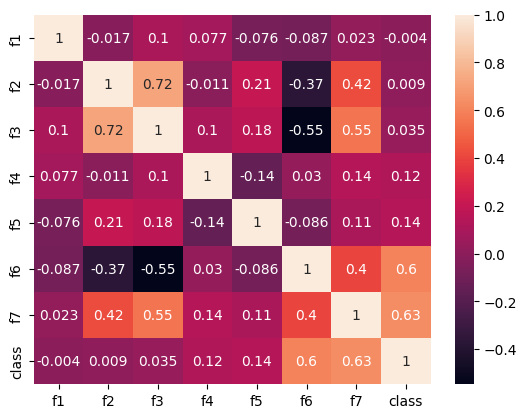

In [138]:
sns.heatmap(corr_matrix, annot=True)

Признаки f1, f2 и f3 имеют крайне малую корреляционную связь с классом, соответственно, мы можем не использовать их для обучения модели, так как они скорее всего не будут влиять на результат.

In [139]:
df = df.drop("f1", axis=1)
df = df.drop("f2", axis=1)
df = df.drop("f3", axis=1)
df.head()

,f4,f5,f6,f7,class
0,-0.016756,-2.245718,0.101312,-0.323289,0
2,2.222336,1.063594,-0.938602,2.137279,2
3,0.620968,0.609596,-0.728940,-0.915802,2
4,-1.301319,-0.908172,-3.227038,-1.729038,0
5,-1.087863,1.337721,-1.743601,-0.801131,0


<AxesSubplot: >

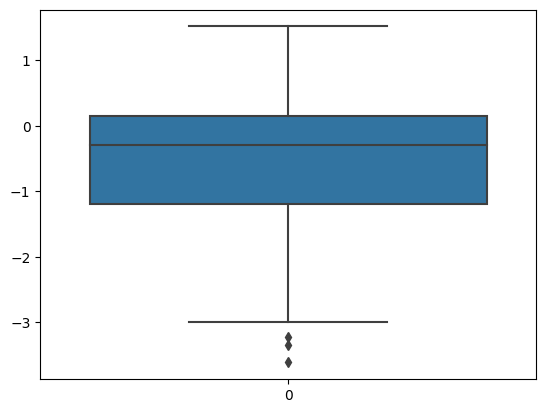

In [140]:
sns.boxplot(df.f6)

Выбросы наблюдаются только в признаке f6.

In [141]:
#df = df.loc[df['f6'] >= -3]
#df

<AxesSubplot: >

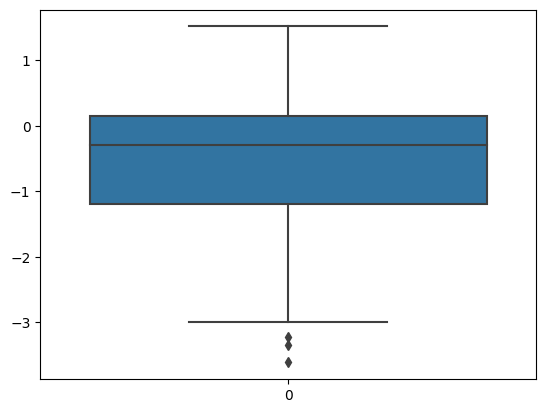

In [142]:
sns.boxplot(df["f6"])

## 3. Разбейте выборку на тренировочные и тестовые данные (60% на 40%).

In [143]:
from sklearn.model_selection import train_test_split

x = df.drop("class", axis=1)
y = df['class']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.4, random_state=42) 

## 4. Для предсказания класса постройте две модели, используя библиотеку sklearn:
a. Случайный лес RandomForestClassifier()
b. Метод ближайших соседей KNeighborsClassifier()

### a. Случайный лес RandomForestClassifier()

In [161]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(x_train, y_train)
print(f"score: {rfc.score(x_test, y_test)}")
print(classification_report(rfc.predict(x_test), y_test))

score: 0.8055555555555556
              precision    recall  f1-score   support

           0       0.91      1.00      0.95        10
           1       0.75      0.69      0.72        13
           2       0.77      0.77      0.77        13

    accuracy                           0.81        36
   macro avg       0.81      0.82      0.81        36
weighted avg       0.80      0.81      0.80        36



### b. Метод ближайших соседей KNeighborsClassifier()

In [148]:
from sklearn.neighbors import KNeighborsClassifier

knc = KNeighborsClassifier(n_neighbors=10)
knc.fit(x_train, y_train)
print(f"score: {knc.score(x_test, y_test)}")
print(classification_report(knc.predict(x_test), y_test))

score: 0.8055555555555556
              precision    recall  f1-score   support

           0       1.00      0.92      0.96        12
           1       0.75      0.75      0.75        12
           2       0.69      0.75      0.72        12

    accuracy                           0.81        36
   macro avg       0.81      0.81      0.81        36
weighted avg       0.81      0.81      0.81        36



In [166]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(x_train, y_train)
print(f"score: {lr.score(x_test, y_test)}")

score: 0.7222222222222222


Наилучший результат дала модель KNeighborsClassifier()